In [6]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import os
import timeit

from models import globalvariables as GV
from models import geometry_models as geo_m
from models import physic_model as phy_m
from models import material_model as mat_m
from models import statistic_model as stat_m

from controllers import geometry_controller as geo_c
from controllers import physics_controller as phy_c
from controllers import material_controller as mat_c
from controllers import statistic_controller as stat_c

# Base directory
base_dir = 'cross_sections_Janis'

U238_total = np.loadtxt(os.path.join(base_dir, 'U238', 'U238_total.csv'), delimiter=';', skiprows=3)
U238_scattering = np.loadtxt(os.path.join(base_dir, 'U238', 'U238_scattering.csv'), delimiter=';', skiprows=3)
U238_fission = np.loadtxt(os.path.join(base_dir, 'U238', 'U238_fission.csv'), delimiter=';', skiprows=3)
U238_nu = np.loadtxt(os.path.join(base_dir, 'U238', 'U238_nu.csv'), delimiter=';', skiprows=3)

U235_total = np.loadtxt(os.path.join(base_dir, 'U235', 'U235_total.csv'), delimiter=';', skiprows=3)
U235_scattering = np.loadtxt(os.path.join(base_dir, 'U235', 'U235_scattering.csv'), delimiter=';', skiprows=3)
U235_fission = np.loadtxt(os.path.join(base_dir, 'U235', 'U235_fission.csv'), delimiter=';', skiprows=3)
U235_nu = np.loadtxt(os.path.join(base_dir, 'U235', 'U235_nu.csv'), delimiter=';', skiprows=3)

U234_total = np.loadtxt(os.path.join(base_dir, 'U234', 'U234_total.csv'), delimiter=';', skiprows=3)
U234_scattering = np.loadtxt(os.path.join(base_dir, 'U234', 'U234_scattering.csv'), delimiter=';', skiprows=3)
U234_fission = np.loadtxt(os.path.join(base_dir, 'U234', 'U234_fission.csv'), delimiter=';', skiprows=3)
U234_nu = np.loadtxt(os.path.join(base_dir, 'U234', 'U234_nu.csv'), delimiter=';', skiprows=3)

uranium238 = mat_m.isotope(92,238,4.4984E21,U238_total[:,0],U238_total[:,1],U238_scattering[:,1],U238_fission[:,1],U238_nu[:,1])
uranium235 = mat_m.isotope(92,235,4.4994E22,U235_total[:,0],U235_total[:,1],U235_scattering[:,1],U235_fission[:,1],U235_nu[:,1])
uranium234 = mat_m.isotope(92,234,4.9184E20,U234_total[:,0],U234_total[:,1],U234_scattering[:,1],U234_fission[:,1],U234_nu[:,1])
source = phy_m.source(GV.Nstories,GV.LL,100,'watt')
particle_squeue = []

In [7]:
SS = np.trapz(uranium235.nu*uranium235.micro_xs_fission*uranium235.atomic_density,uranium235.energy)
ff = lambda eout: uranium235.nu_avg(eout)*uranium235.macro_xs_fission(eout)/SS
std_rej = []
log_rej = []
xx = np.array([10,20,50,100])

In [8]:
for ii in xx:
    time_standard_rejection = timeit.timeit(lambda: stat_m.rejection(ff,uranium235.energy), number=int(ii+1))
    time_log_rejection = timeit.timeit(lambda: stat_m.rejection(ff,uranium235.energy,log=True), number=int(ii+1))
    std_rej.append(time_standard_rejection)
    log_rej.append(time_log_rejection)

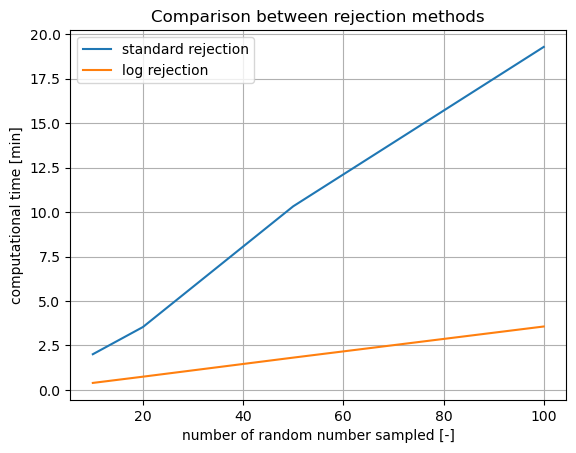

In [11]:
plt.plot(xx,std_rej,label='standard rejection')
plt.plot(xx,log_rej,label='log rejection')
plt.grid()
plt.xlabel('number of random number sampled [-]')
plt.ylabel('computational time [min]')
plt.title('Comparison between rejection methods')
plt.legend()
plt.show()